In [18]:
import os
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt


In [19]:
df = gpd.read_file('data/arctic_communities.geojson')
df = df.explode(index_parts=False).reset_index(drop=True)

In [3]:
row = df.iloc[0]
row.geometry.bounds[1]

56.511035156249996

In [4]:
poly = df.iloc[[0]]
poly.total_bounds[1]

56.511035156249996

In [20]:
df['miny'] = df.apply(lambda row: row.geometry.bounds[1], axis=1)

In [21]:
arctic = df[df.miny >=40].to_crs('epsg:3857')

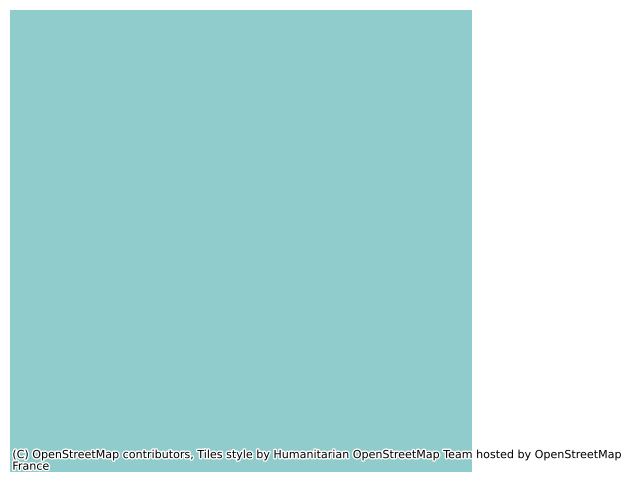

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

ctx.add_basemap(ax, zoom=0)
arctic.plot(
    ax=ax,
    alpha=0.3)

plt.show()

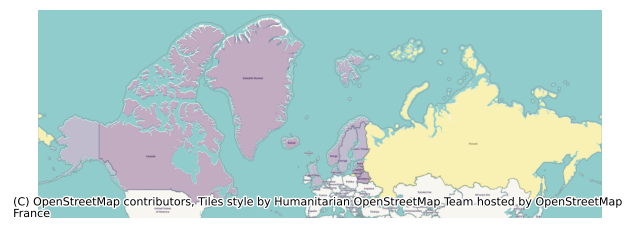

In [26]:
# Ensure your GeoDataFrame is in the Web Mercator projection
arctic = arctic.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Plot your data
arctic.plot(ax=ax, column='n_communities', alpha=0.3)

# Add a basemap with a specified zoom level
ctx.add_basemap(ax, zoom=3)  # Adjust the zoom level as needed for your map extent

plt.show()

In [30]:
# Ensure your GeoDataFrame is in the Web Mercator projection
arctic = arctic.to_crs(epsg=3413)

fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Plot your data
arctic.plot(ax=ax, column='n_communities', alpha=0.3)

# Add a basemap with a specified zoom level
ctx.add_basemap(ax, crs=arctic.crs, zoom=6)  # Adjust the zoom level as needed for your map extent

plt.show()